In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.kinematic_cuts as kcuts 

Welcome to JupyROOT 6.24/04


In [2]:
ROOT.EnableImplicitMT()
ROOT.gStyle.SetOptStat(0)


In [3]:
df_pipkmks = tools.get_dataframe('pipkmks', 'spring', 'data', filtered=False)
df_pimkpks = tools.get_dataframe('pimkpks', 'spring', 'data', filtered=False)

df_pipkmks = df_pipkmks.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.KINFIT_CL_CUT)\
                       .Filter(kcuts.MX2_PPIPKMKS_CUT).Filter(kcuts.KS_PATHLENGTH_CUT).Filter(kcuts.KS_MASS_CUT).Filter(kcuts.P_P_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.KINFIT_CL_CUT)\
                       .Filter(kcuts.MX2_PPIMKPKS_CUT).Filter(kcuts.KS_PATHLENGTH_CUT).Filter(kcuts.KS_MASS_CUT).Filter(kcuts.P_P_CUT)

#### Baryon Plots


In [4]:
hist_ppip = df_pipkmks.Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo1D(('ppip', 'ppip', 200, 1.0, 3.0), 'ppip_m')
hist_ppim = df_pimkpks.Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Histo1D(('ppim', 'ppim', 200, 1.0, 3.0), 'ppim_m')

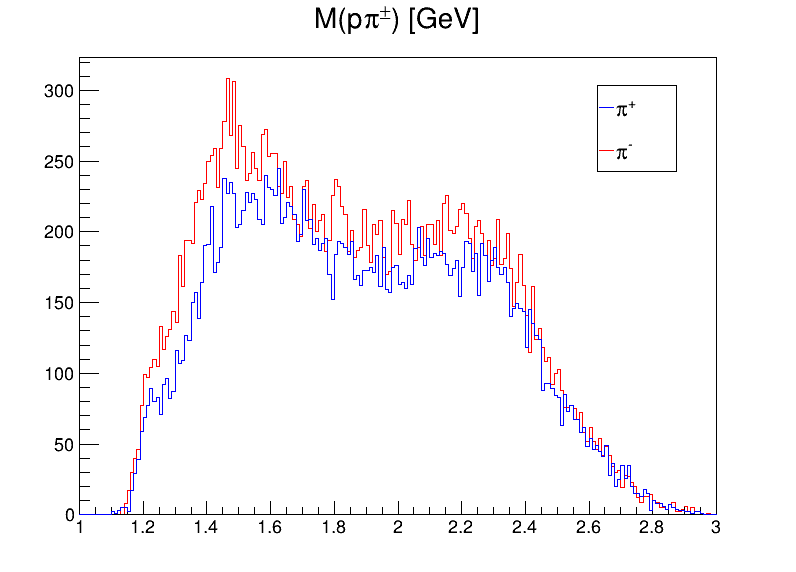

In [5]:
c = ROOT.TCanvas('c', 'c', 800, 600)
hist_ppip.SetLineColor(ROOT.kBlue)
hist_ppim.SetLineColor(ROOT.kRed)
sorted_hists = tools.sort_hists_by_max([hist_ppip, hist_ppim])
sorted_hists[0].SetTitle('M(p#pi^{#pm}) [GeV]')
sorted_hists[0].Draw()
sorted_hists[1].Draw('same')
legend = ROOT.TLegend(0.75, 0.7, 0.85, 0.85)
legend.AddEntry(hist_ppip.GetPtr(), '#pi^{+}', 'l')
legend.AddEntry(hist_ppim.GetPtr(), '#pi^{-}', 'l')
legend.Draw()
c.Draw()

In [6]:
hist_ksp_pipkmks = df_pipkmks.Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('ksp_pipkmks', 'M(pK_{s})', 200, 1.5, 4.0), 'ksp_m')
hist_ksp_pimkpks = df_pimkpks.Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D(('ksp_pimkpks', 'M(pK_{s})', 200, 1.5, 4.0), 'ksp_m')
hist_kmp = df_pipkmks.Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Histo1D(('kmp', 'M(K^{-}p)', 200, 1.5, 4.0), 'kmp_m')
hist_kpp = df_pimkpks.Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.PPIM_MASS_CUT).Histo1D(('kpp', 'M(K^{+}p)', 200, 1.5, 4.0), 'kpp_m')

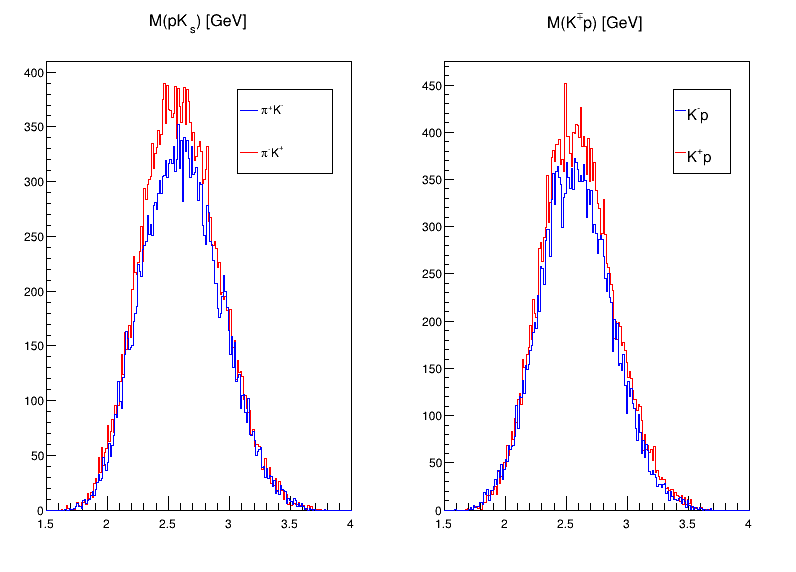

In [7]:
c.Clear()
c.Divide(2,1)
c.cd(1)
hist_ksp_pipkmks.SetLineColor(ROOT.kBlue)
hist_ksp_pimkpks.SetLineColor(ROOT.kRed)
sorted_hists_ks = tools.sort_hists_by_max([hist_ksp_pipkmks, hist_ksp_pimkpks])
sorted_hists_ks[0].SetTitle('M(pK_{s}) [GeV]')
legend_ks = ROOT.TLegend(0.6, 0.7, 0.85, 0.85)
legend_ks.AddEntry(hist_ksp_pipkmks.GetPtr(), '#pi^{+}K^{-}', 'l')
legend_ks.AddEntry(hist_ksp_pimkpks.GetPtr(), '#pi^{-}K^{+}', 'l')
sorted_hists_ks[0].Draw()
sorted_hists_ks[1].Draw('same')
legend_ks.Draw()
c.cd(2)
hist_kmp.SetLineColor(ROOT.kBlue)
hist_kpp.SetLineColor(ROOT.kRed)
sorted_hists_kp = tools.sort_hists_by_max([hist_kmp, hist_kpp])
sorted_hists_kp[0].SetTitle('M(K^{#mp}p) [GeV]')
legend_kp = ROOT.TLegend(0.7, 0.7, 0.85, 0.85)
legend_kp.AddEntry(hist_kmp.GetPtr(), 'K^{-}p', 'l')
legend_kp.AddEntry(hist_kpp.GetPtr(), 'K^{+}p', 'l')
sorted_hists_kp[0].Draw()
sorted_hists_kp[1].Draw('same')
legend_kp.Draw()
c.Draw()

In [8]:
# TODO: bin in t